<a href="https://colab.research.google.com/github/MingiJ/Market-Penetration/blob/master/MarketPenetration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Market Penetration

##Defining the question




##Specifying the data analysis question

1. Which influencer will you go to in your particular niche of business and does the content of the influencer matter?
2. Do people tend to buy things after an influencer who buys and recommends it to them?
3. Which age group is more open to influencer marketing? 

4. Do people buy things just because someone who they think is an expert and associate with personally buys it?

##Define the metrics of Success
The R-squared (R2) scores will be the metrics by which we evaluate the success of the impact of infuencer marketing prediction model.

##Understanding Context
Influencer marketing is a new but innovative form of online marketing. It has been trending for a while now, and the mainstream media regularly refers to it. Yet, there are still people and business owners who don’t really understand what influencer marketing is or how to leverage it. Influencer marketing involves a brand collaborating with an online influencer to market one of its products or services. Some influencer marketing collaborations are less tangible than that – brands simply work with influencers to improve brand recognition. There are platforms that link businesses with influencers who are ready and willing to work with them e.g. https://wowzi.co/ this indicates that influencers are being adapted into the marketing sphere slowly but surely. This report describes the work to learn to predict which influencer will be beneficial to your marketing campaign based on market research.

## Recording Experimental Design
1. Define the research question
2. Data Importation
3. Data Exploration and Cleaning
4. Data Analysis (Univariate, Bivariate and Multivariate Analysis)
5. Feature Engineering
6. Data Preparation
7. Data Modeling
8. Model Evaluation
9. Recommendations / Conclusion
10.  Challenging your Solution

 ### Data Relevance

 The data for this project comes Dataset for the article on "Effect of Social Media Influencer Marketing on Purchase Intention and the Mediation Effect of Credibility". It is thus appropriate for answering the research question.

##Importing Libraries

In [1]:
!pip install factor_analyzer==0.2.3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
sns.set(style="ticks", color_codes=True)
np.set_printoptions(threshold=np.inf)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Importing Dataset

In [3]:
dataset = pd.read_csv('Influencer_marketing_dataset.csv')

##Data Cleaning : Managing Columns

In [4]:
#Renaming dataset columns for ease of access: removing spaces and making all elements lowercase to make them easier to work with

In [5]:
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('?','')
dataset.insert(0, 'ID', range(0,len(dataset)))
age_bracket = dataset.loc[:,['age','do_you_follow_any_influencers_on_the_social_media_sites']]
#Removing all the respondents who do not follow influencers on social media because the rest of their entries were blank/empty
dataset = dataset[dataset.do_you_follow_any_influencers_on_the_social_media_sites!= 'No']
df = dataset.drop(dataset.tail(4).index,inplace=False)
df = df.dropna(subset=['kindly_list_one_or_two_of_your_favourite_social_media_inﬂuencers_whose_pages/channels_you_visit_and_follow_regularly.'],inplace= False)
df['what_kind_of_pages/channels_you_are_most_interested_in_and/or_follow_on_these_social_media_sites'] = df['what_kind_of_pages/channels_you_are_most_interested_in_and/or_follow_on_these_social_media_sites'].str.replace('and',',')
df['kindly_list_one_or_two_of_your_favourite_social_media_inﬂuencers_whose_pages/channels_you_visit_and_follow_regularly.'] = df['kindly_list_one_or_two_of_your_favourite_social_media_inﬂuencers_whose_pages/channels_you_visit_and_follow_regularly.'].str.replace('and',',')

In [6]:
df.columns

Index(['ID', 'gender', 'age', 'educational_qualification',
       'which_of_the_following_social_media_sites_do_you_use',
       'how_frequently_do_you_use_the_above_selected_social_media_sites',
       'what_kind_of_pages/channels_you_are_most_interested_in_and/or_follow_on_these_social_media_sites',
       'do_you_follow_any_influencers_on_the_social_media_sites',
       'kindly_list_one_or_two_of_your_favourite_social_media_inﬂuencers_whose_pages/channels_you_visit_and_follow_regularly.',
       'keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[i_feel_that_the_influencer_is_an_expert.]',
       'keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[i_feel_that_the_influencer_is_experienced.]',
       'keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_lev

In [7]:
df.head()

,ID,gender,age,educational_qualification,which_of_the_following_social_media_sites_do_you_use,how_frequently_do_you_use_the_above_selected_social_media_sites,what_kind_of_pages/channels_you_are_most_interested_in_and/or_follow_on_these_social_media_sites,do_you_follow_any_influencers_on_the_social_media_sites,kindly_list_one_or_two_of_your_favourite_social_media_inﬂuencers_whose_pages/channels_you_visit_and_follow_regularly.,"keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[i_feel_that_the_influencer_is_an_expert.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[i_feel_that_the_influencer_is_experienced.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[i_feel_that_the_influencer_is_qualiﬁed.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[i_feel_that_the_influencer_is_skilled.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[i_feel_that_the_influencer_is_dependable.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[i_feel_that_the_influencer_is_honest.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[i_feel_that_the_influencer_is_reliable.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[i_feel_that_the_influencer_is_friendly.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[i_feel_that_the_influencer_is_likeable.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[i_feel_that_his/her_information_is_convincing.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[i_feel_that_his/her_information_is_supported_by_strong_arguments.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[the_influencer’s_posts/videos_provide_believable_information.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[the_influencer’s_posts/videos_provide_reliable_information.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[the_influencer’s_posts/videos_are_exciting.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[the_influencer’s_posts/videos_are_delightful.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[the_influencer’s_posts/videos_are_thrilling.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[the_influencer’s_posts/videos_are_enjoyable.]","keeping_in_mind_the_influencer_whose_name_you_wrote_in_the_above_answer,_rate_the_level_of_your_agreement_or_disagreement_to_the_following_statements:_[posts

##Split By Commas

###Social Media Platform Column

In [8]:
#Removing all the commas in the social media platform column in order to quantify the frequency of each platform.

In [9]:
new_df = pd.DataFrame(df.which_of_the_following_social_media_sites_do_you_use.str.split(',').tolist(), index=df.ID).stack()
new_df = new_df.reset_index([0, 'ID'])
new_df.columns = ['ID', 'platform']
new_df.platform = new_df.platform.str.replace(' ', '')

In [10]:
len(df)

63

##Data Visualization

###Popularity of the Social Media Platform

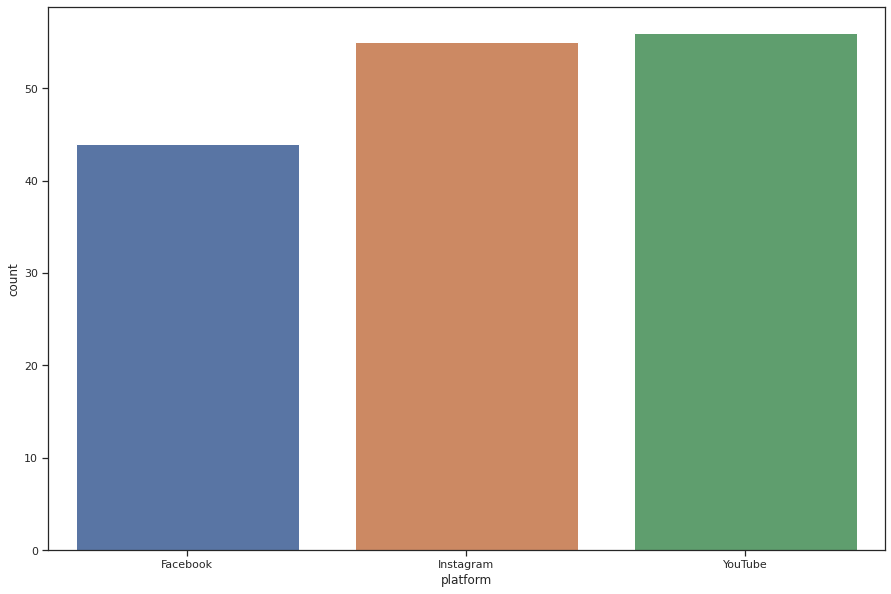

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(x='platform',data=new_df)

In [12]:
#This suggests that the most popular platform among the target audience for influencer marketing is YouTube but the reach is almost the same as Instagram with Facebook lagging behind

###Age group Distritubion graph

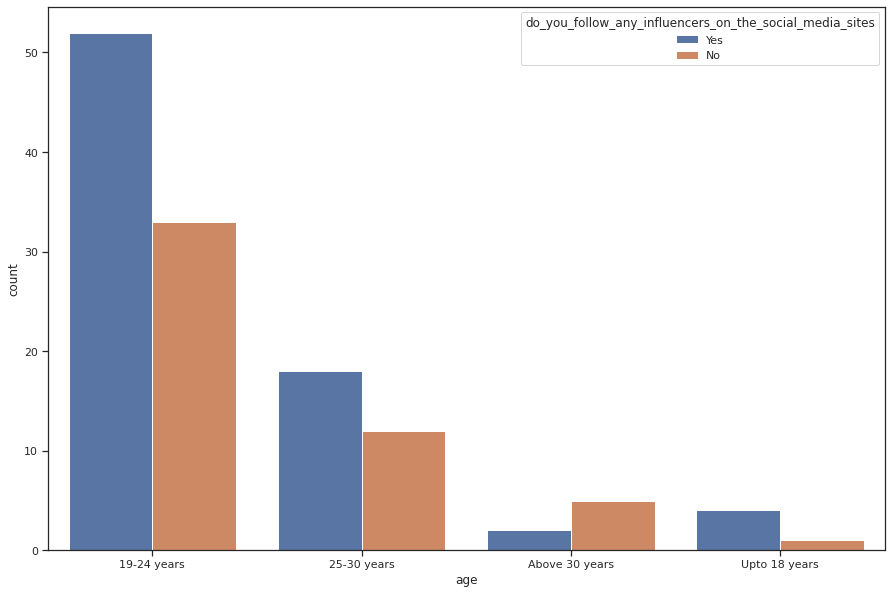

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(x='age',hue='do_you_follow_any_influencers_on_the_social_media_sites',data=age_bracket)

In [14]:
#The Age group that is most open to influencer marketing is 19-24 years closely followed by the 25-30 years group.
#This suggests that the youth in the workspace are more likely to purchase influecer marketed goods,
#this could be due to the need to live up with current trends and also to conform to the latest social 'drip' or accesories

###Influencers Column

In [15]:
#Removing the commas, spaces and conjuctions in the influencer's column in order to properly quantify each influencer as a single entity

In [16]:
new_df2 = pd.DataFrame(df['kindly_list_one_or_two_of_your_favourite_social_media_inﬂuencers_whose_pages/channels_you_visit_and_follow_regularly.'].str.split(',').tolist(), index=df.ID).stack()
new_df2 = new_df2.reset_index([0, 'ID'])
new_df2.columns = ['ID', 'influencer']
new_df2.influencer = new_df2.influencer.str.replace(' ', '').str.replace('and',',')
nan_value = float("NaN")
new_df2.replace("", nan_value, inplace=True)
new_df2 = new_df2.dropna(subset=['influencer'])

###Influencer Popularity


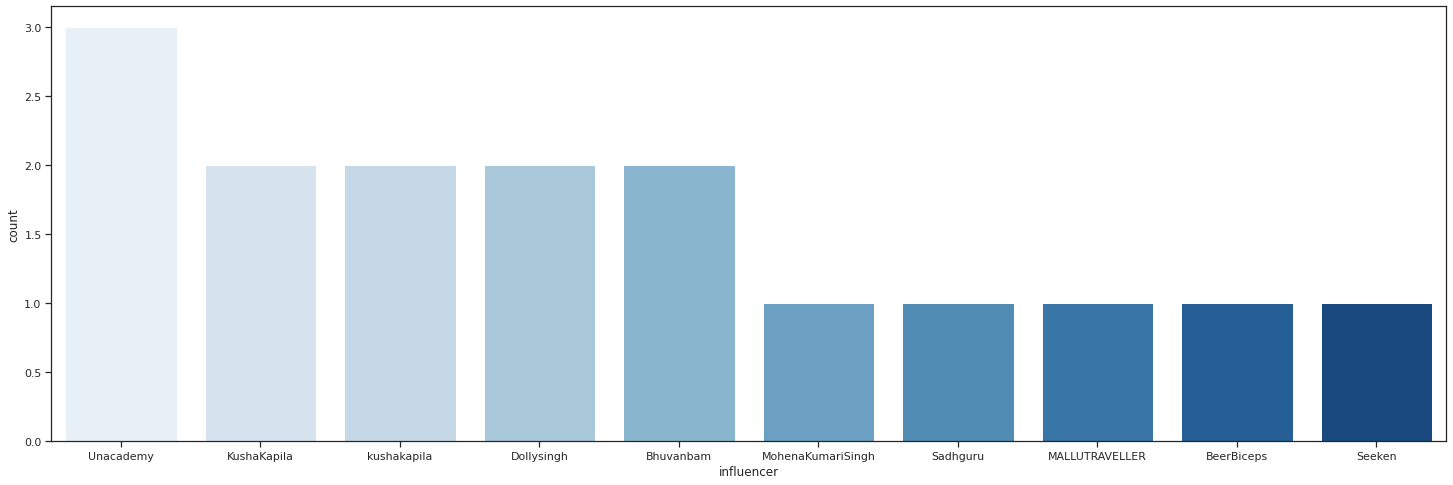

In [17]:
fig, ax = plt.subplots(figsize=(25,8))
sns.countplot(new_df2.influencer,order=pd.value_counts(new_df2['influencer']).iloc[:10].index,palette='Blues')

In [18]:
#The data fails to point out a clear distinction in popularity of influencers there being only one influencer mentioned thrice. A larger dataset would be
#more beneficial to bring about more variety and even a sense of bias as is seen in real life 

###Interests Column

In [19]:
#Removing commas and conjuctions in the interests column

In [20]:
new_df3 = pd.DataFrame(df['what_kind_of_pages/channels_you_are_most_interested_in_and/or_follow_on_these_social_media_sites'].str.split(',').tolist(), index=df.ID).stack()
new_df3 = new_df3.reset_index([0, 'ID'])

###Setting Column Names

In [21]:
new_df3.columns = ['ID', 'interests']

###Merging the three Columns

In [22]:
#Merging all the three columns to make a summary table

In [23]:
summary_table = pd.merge(new_df, new_df2, on='ID')
summary_table = pd.merge(summary_table,new_df3,on='ID')
summary_table = pd.merge(summary_table,dataset,on='ID')

###Dropping the original Unsplit Columns

In [24]:
#Dropping the original unsplit columns

In [25]:
summary_table.drop(['which_of_the_following_social_media_sites_do_you_use','kindly_list_one_or_two_of_your_favourite_social_media_inﬂuencers_whose_pages/channels_you_visit_and_follow_regularly.','unnamed:_31','what_kind_of_pages/channels_you_are_most_interested_in_and/or_follow_on_these_social_media_sites'],axis=1,inplace=True)

###Renaming Columns

In [26]:
#Renaming the columns to make easier to manipulate

In [27]:
summary_table.columns = ['id','platform','influencer','interests','gender','age','education','frequency','follow_influencer','is_expert','is_experienced','is_qualified','is_skilled','is_dependable','is_honest','is_reliable','is_friendly','is_likeable','is_convincing','is_compelling','is_believable','is_credible','is_exciting','is_delightful','is_thrilling','is_enjoyable','provides_exposure','complement_buying','approve_influencerMarketing','would_buy_influencerMarketedProducts','purchases_InfluencerMarketedProducts','agreeWithInfluencersPreferences']
summary_table.platform = summary_table.platform.str.replace(' ', '')

###Creating ordinal scales

In [28]:
#Giving the likert scale quantifiable measurement the machine learning model will understand rather than having actual text 

In [29]:
likert_scale = {'Strongly Disagree': 1,
                'Disagree': 2,
                'Neither Agree nor Disagree': 3,
                'Agree' : 4,
                'Strongly Agree': 5}
                
frequency_scale = {'Weekly':1,
                   'Daily':2}

###Mapping the Scales

In [30]:
summary_table.replace(likert_scale,inplace=True)
summary_table.replace(frequency_scale,inplace=True)

###Graphical Representation of what people are interested about


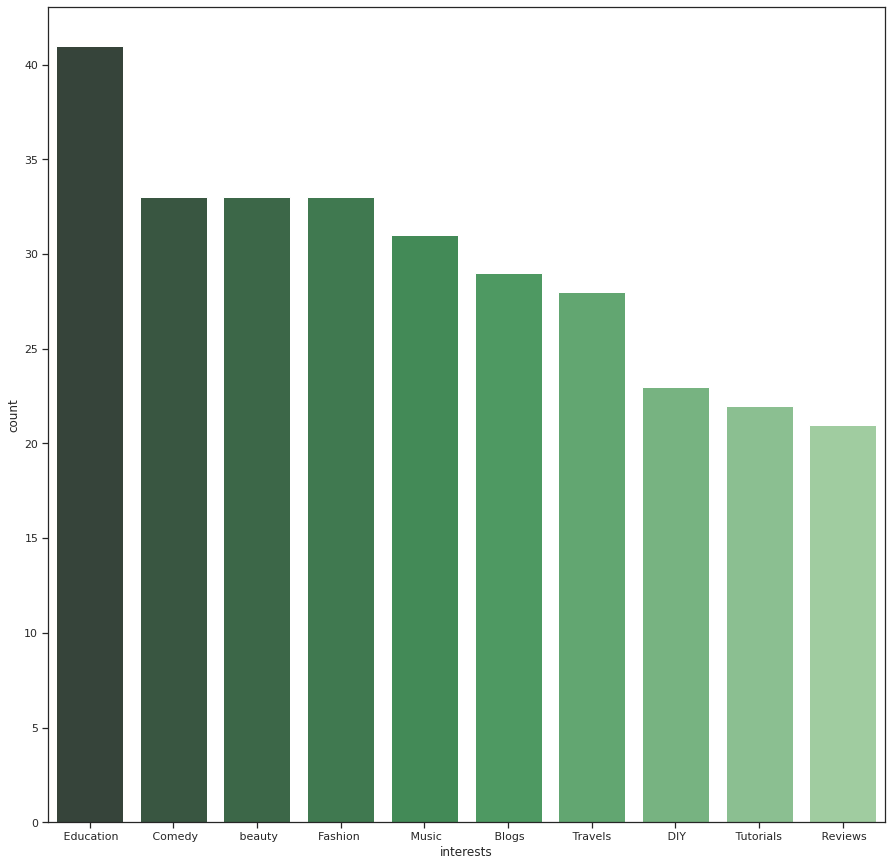

In [31]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(new_df3.interests,order=pd.value_counts(new_df3['interests']).iloc[:10].index,palette='Greens_d')

In [32]:
#People tend to view more content on education that any other domain with the rest of the interests differing slightly. This is because the data was mostly
#among the youth. Especially 19-24 years old. Who are predominantly students. Indians guys on youtube

###Likelihood of people to buy Goods Based on Gender

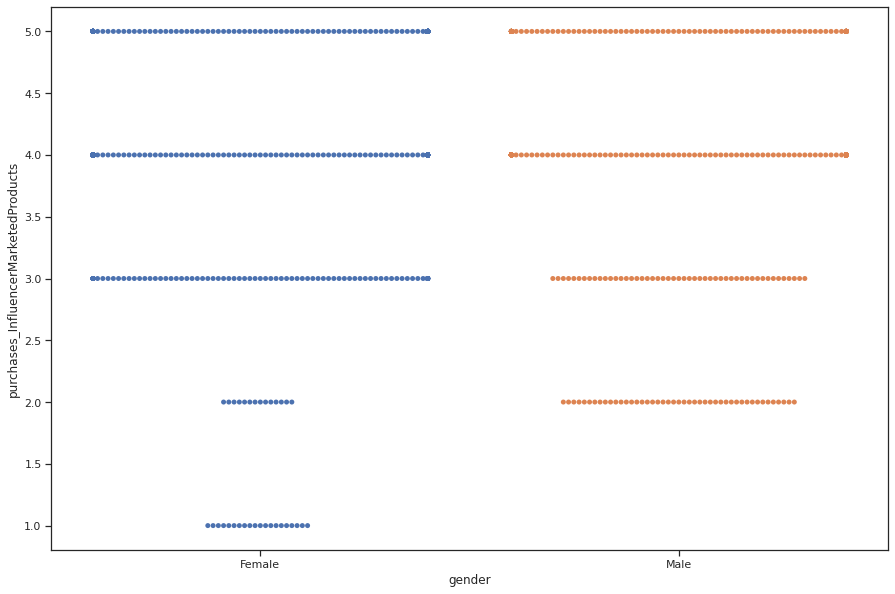

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.swarmplot(x="gender", y="purchases_InfluencerMarketedProducts", data=summary_table)

In [34]:
!pip install squarify

(0.0, 100.0, 0.0, 100.0)

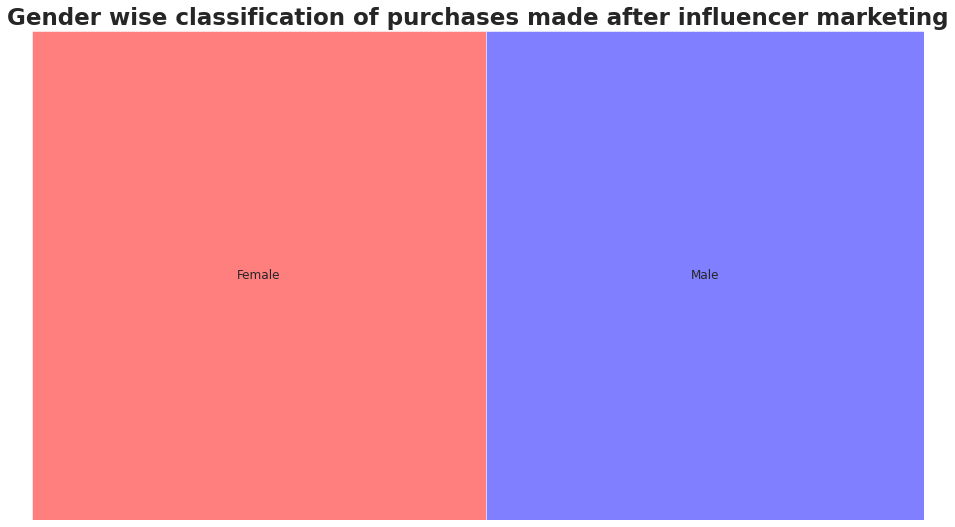

In [35]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)

squarify.plot(sizes = pd.value_counts(summary_table.gender), 
              label=summary_table.gender.unique(),
              color=['red','blue'],
              alpha=0.5)
plt.title("Gender wise classification of purchases made after influencer marketing",fontsize=23,fontweight="bold")
plt.axis('off')

In [36]:
#The distribution is almost equal but the data also suggestst that more women than men are likely to buy more products after influencer marketing.
#We have more data points from females because there is a wider range of entries but men are more likely to purchase goods/services because they
#did not have any data points on the strongly disagree scale

###Likelihood of people to buy Goods Based on Age

(0.0, 100.0, 0.0, 100.0)

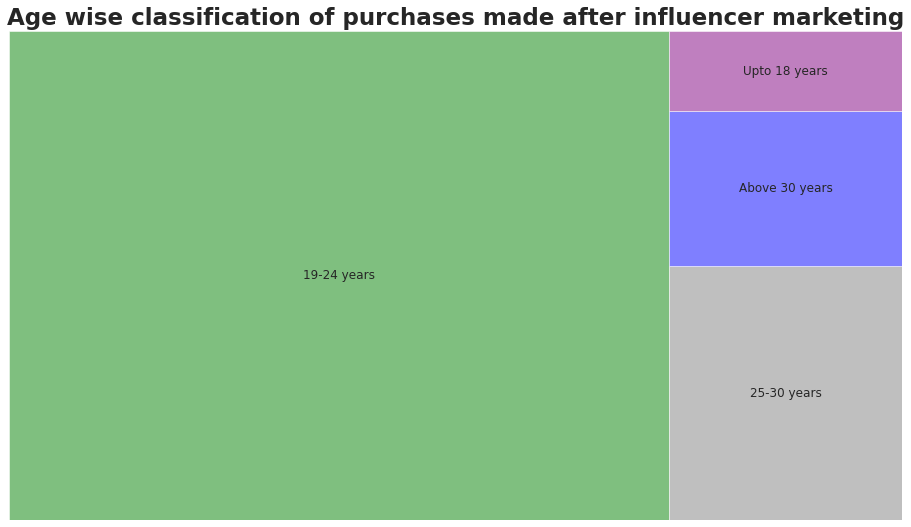

In [37]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)

squarify.plot(sizes = pd.value_counts(summary_table.age), 
              label=summary_table.age.unique(),
              color=['green', 'grey', 'blue','purple'],
              alpha=0.5)
plt.title("Age wise classification of purchases made after influencer marketing",fontsize=23,fontweight="bold")
plt.axis('off')

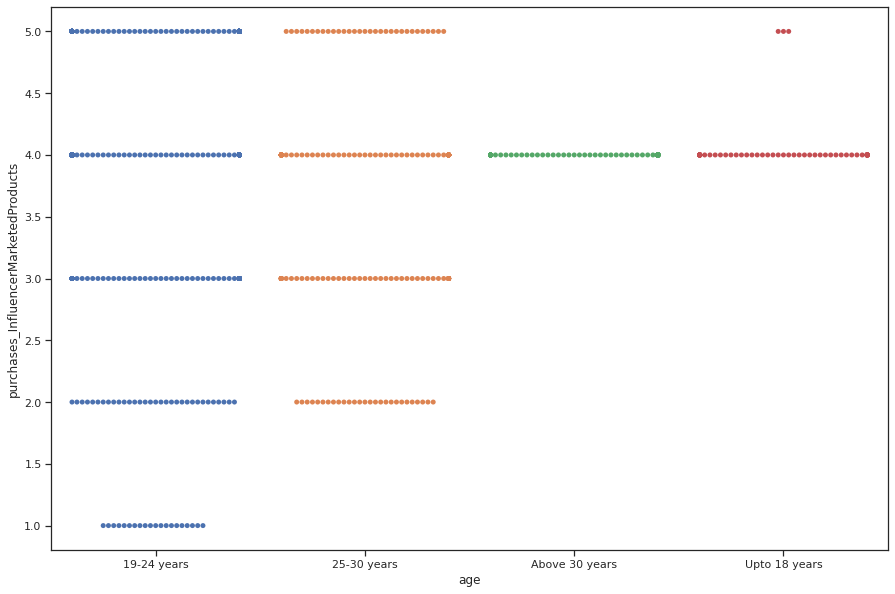

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.swarmplot(x="age", y="purchases_InfluencerMarketedProducts", data=summary_table)

In [39]:
#Majority of people purchasing the goods after influencer marketing still lie in that 19-24 years group. The data also shows that there is a somewhat
#equal distribition towards the sentiment of buying goods/services in the 19-24 and 25-30 age groups but in the latter age groups the likelihood that
#they purchase the goods/services is high after influencer 
#People in the age of upto 18 years are probably saving up to buy that one thing their saw marketed online

##Grouping influencer Data

In [40]:
influencer_group = summary_table

In [41]:
nan_value = float("NaN")
influencer_group.replace("", nan_value, inplace=True)
influencer_group.dropna(subset = ["influencer"], inplace=True)
influencer_group['influencer'] = influencer_group['influencer'].str.lower()
platform_influencer = summary_table.loc[:,['platform','influencer']]
grouped_by_influencers = influencer_group.groupby(['influencer','platform']).agg({
    'is_expert':['median','mean'],
    'is_qualified':['median','mean'],
    'would_buy_influencerMarketedProducts':['median','mean'],
    'purchases_InfluencerMarketedProducts':['median','mean'],
    'agreeWithInfluencersPreferences':['median','mean']
})

In [42]:
grouped_by_influencers

is_expert       ... agreeWithInfluencersPreferences     
                            median mean  ...                          median mean
influencer     platform                  ...                                     
.viratkohli    Facebook          4  4.0  ...                               4  4.0
               Instagram         4  4.0  ...                               4  4.0
               YouTube           4  4.0  ...                               4  4.0
@trainedbyyvs  Facebook          5  5.0  ...                               5  5.0
               Instagram         5  5.0  ...                               5  5.0
...                            ...  ...  ...                             ...  ...
vaibhavkeswani YouTube           2  2.0  ...                               2  2.0
varuninamdar   YouTube           4  4.0  ...                               3  3.0
vivekagnihotri Instagram         5  5.0  ...                               5  5.0
               YouTube           5  5.0  ...                               5  5.0
waysoflifesq   Instagram         4  4.0  ...                               3  3.0

[237 rows x 10 columns]

In [43]:
#Finding each influencers metric on features that have a high correlation to consumers buying goods after influencer marketing and gauging
#their measure of influence

##Constructing the Model

##Feature Score and Correlation

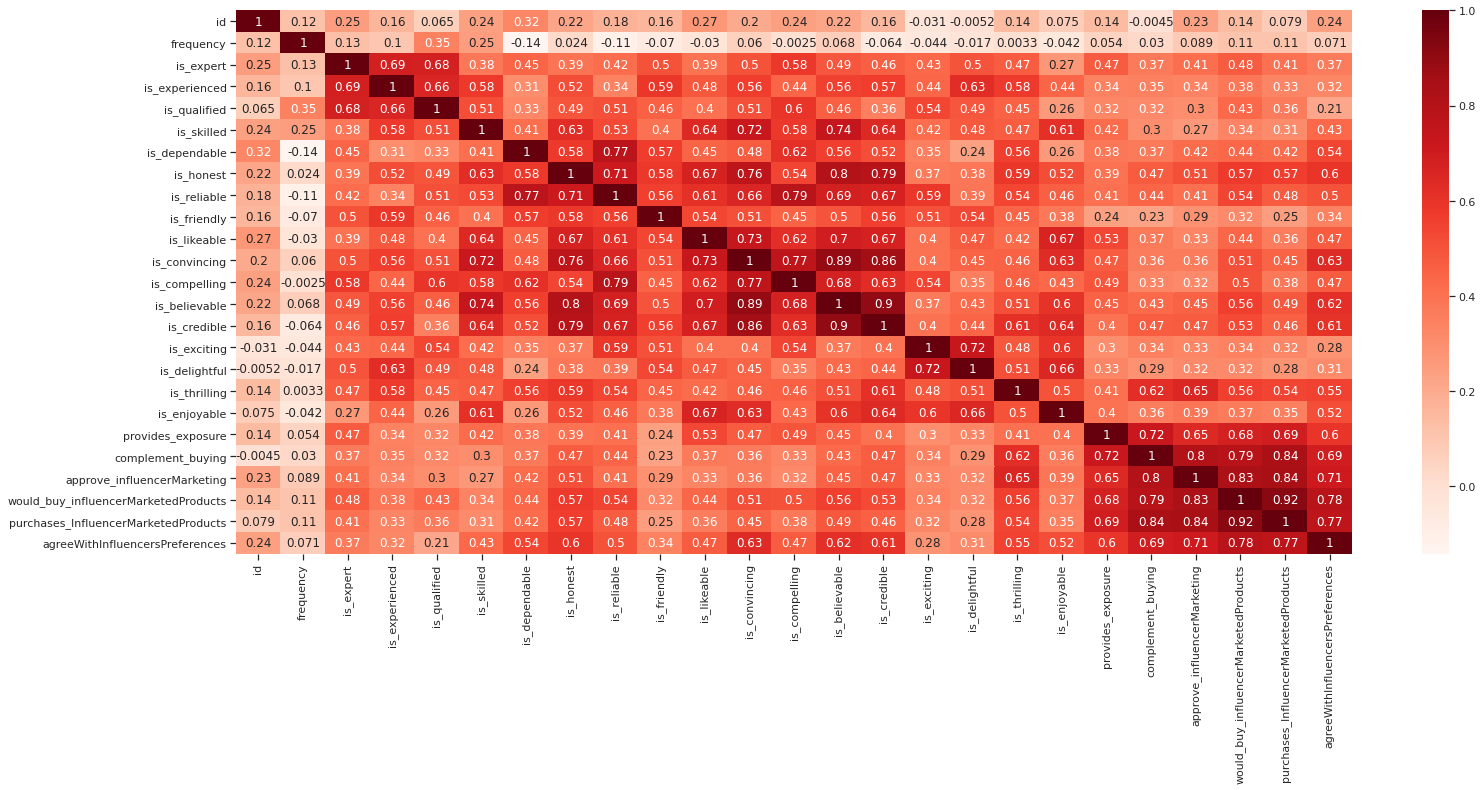

In [44]:
#Using Pearson Correlation
plt.figure(figsize=(25,10))
cor = summary_table.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

##Spliting the training and testing data 

##Managing Columns

###Reading and Organizing the data

In [45]:
dataset = pd.read_csv('Influencer_marketing_dataset.csv')
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('?','')
dataset.insert(0, 'ID', range(0,len(dataset)))
dataset = dataset[dataset.do_you_follow_any_influencers_on_the_social_media_sites!= 'No']
df = dataset.drop(dataset.tail(4).index,inplace=False)
df = df.dropna(subset=['kindly_list_one_or_two_of_your_favourite_social_media_inﬂuencers_whose_pages/channels_you_visit_and_follow_regularly.'],inplace= False)
df = df.drop(['kindly_list_one_or_two_of_your_favourite_social_media_inﬂuencers_whose_pages/channels_you_visit_and_follow_regularly.','do_you_follow_any_influencers_on_the_social_media_sites','what_kind_of_pages/channels_you_are_most_interested_in_and/or_follow_on_these_social_media_sites','unnamed:_31'],axis=1)

In [46]:
df.columns = ['id','gender','age','education','platform','frequency','is_expert','is_experienced','is_qualified','is_skilled','is_dependable','is_honest','is_reliable','is_friendly','is_likeable','is_convincing','is_compelling','is_believable','is_credible','is_exciting','is_delightful','is_thrilling','is_enjoyable','provides_exposure','complement_buying','approve_influencerMarketing','would_buy_influencerMarketedProducts','agreeWithInfluencersPreferences','purchases_InfluencerMarketedProducts']
df.platform = df.platform.str.replace(' ', '')
df.gender = df.gender.str.replace(' ','')
likert_scale = {'Strongly Disagree': 1,
                'Disagree': 2,
                'Neither Agree nor Disagree': 3,
                'Agree' : 4,
                'Strongly Agree': 5}
                
frequency_scale = {'Rarely':1,
                   'Weekly':2,
                   'Daily':3}
df.replace(likert_scale,inplace=True)
df.replace(frequency_scale,inplace=True)

In [47]:
df = df.drop(['platform'],axis=1)

In [48]:
pimd = 'purchases_InfluencerMarketedProducts'
awip = 'agreeWithInfluencersPreferences'
def swap_columns(df, pimd, awip):
    df['temp'] = df[c1]
    df[c1] = df[c2]
    df[c2] = df['temp']
    df.drop(columns=['temp'], inplace=True)

In [49]:
df.head()

,id,gender,age,education,frequency,is_expert,is_experienced,is_qualified,is_skilled,is_dependable,is_honest,is_reliable,is_friendly,is_likeable,is_convincing,is_compelling,is_believable,is_credible,is_exciting,is_delightful,is_thrilling,is_enjoyable,provides_exposure,complement_buying,approve_influencerMarketing,would_buy_influencerMarketedProducts,agreeWithInfluencersPreferences,purchases_InfluencerMarketedProducts
0,0,Female,19-24 years,Post Graduate,3,4,5,4,4,4,5,4,4,5,5,4,5,5,4,5,4,5,5,4,4,5,5,5
1,1,Male,25-30 years,Post Graduate,3,4,4,5,4,2,4,5,4,3,4,4,4,3,4,4,3,4,3,4,4,4,3,3
3,3,Female,19-24 years,Post Graduate,3,4,4,5,5,4,4,5,5,5,5,5,5,5,5,5,4,5,4,5,4,5,5,5
4,4,Female,25-30 years,Doctorate,3,4,4,4,2,2,1,2,3,5,2,2,3,2,4,4,2,3,5,5,5,4,4,3
6,6,Male,25-30 years,Graduate,3,5,5,5,5,2,5,4,4,5,5,4,5,5,5,5,3,5,5,5,4,5,5,4


In [50]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

###Encoding Categorical Data

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
age_bracket.dropna(subset=['do_you_follow_any_influencers_on_the_social_media_sites'],inplace=True)

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [55]:
#Preparing the data for fitting the model

##Feature Selection and Engineering 

###oops

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state = 0)

####The SVM RBF performed the best because of the vast number of features that were available and it is well suited for dimensionality reduction

###Variance Threshold

In [67]:
#This is used to drop the values with that have a variance of 0.3 and lower.
#The idea is when a feature doesn’t vary much within itself, it generally has very little predictive power.

In [68]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.3)

sel.fit_transform(X)[:10]

array([[4, 5, 4, 4, 4, 5, 4, 4, 5, 5, 4, 5, 5, 4, 5, 4, 5, 5, 4, 4, 5, 5],
       [4, 4, 5, 4, 2, 4, 5, 4, 3, 4, 4, 4, 3, 4, 4, 3, 4, 3, 4, 4, 4, 3],
       [4, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 5, 5],
       [4, 4, 4, 2, 2, 1, 2, 3, 5, 2, 2, 3, 2, 4, 4, 2, 3, 5, 5, 5, 4, 4],
       [5, 5, 5, 5, 2, 5, 4, 4, 5, 5, 4, 5, 5, 5, 5, 3, 5, 5, 5, 4, 5, 5],
       [2, 3, 2, 3, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3],
       [3, 4, 4, 4, 2, 4, 4, 4, 4, 5, 5, 4, 4, 5, 5, 3, 4, 5, 4, 3, 3, 3],
       [2, 4, 4, 4, 3, 5, 4, 4, 4, 4, 2, 4, 4, 5, 5, 4, 5, 2, 4, 4, 3, 4],
       [4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2, 2]],
      dtype=object)

###Mutual Information


In [69]:
#We are using mutual_info_classif because we have a classification problem. This quantifies the amount of information
#the feautures give towards determing the target. It gives the correlation between the features and the target variable
#create a new dataframe with the mutual info information

In [70]:
from sklearn.feature_selection import mutual_info_classif

print(mutual_info_classif(X, y))

[0.         0.02588729 0.         0.         0.00755551 0.11901993
 0.         0.         0.01104103 0.         0.         0.12327855
 0.02374955 0.01183269 0.06743478 0.15746407 0.13541751 0.10986649
 0.15092126 0.11455515 0.13506642 0.11291712 0.19946483 0.19881547
 0.         0.03843752 0.17534135 0.11989035 0.25110938 0.17703335
 0.40343338 0.4029101  0.50192806]


###Chi Squared Mean

In [71]:
#This is used to fit the most informative features to the target and it drops the features with the least statistical significance

In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=6).fit_transform(X, y)

In [73]:
X_new[:10]

array([[0.0, 0.0, 4, 4, 5, 5],
       [0.0, 1.0, 2, 4, 4, 3],
       [0.0, 0.0, 4, 4, 5, 5],
       [1.0, 1.0, 2, 5, 4, 4],
       [0.0, 1.0, 2, 4, 5, 5],
       [0.0, 1.0, 4, 3, 3, 3],
       [0.0, 0.0, 2, 3, 3, 3],
       [0.0, 1.0, 3, 4, 3, 4],
       [0.0, 0.0, 3, 4, 4, 4],
       [0.0, 0.0, 4, 2, 2, 2]], dtype=object)

###Fitting the kernel SVM(RBF) Model

In [75]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

###Test Data against predictions

In [76]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5 5]
 [4 4]
 [4 5]
 [4 4]
 [5 5]
 [4 4]
 [4 4]
 [5 5]
 [4 4]
 [5 5]
 [4 2]
 [5 5]
 [4 4]
 [4 5]
 [4 4]
 [4 3]]


##Confusion Matrix and R score Kernel SVM

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
accuracy_score(y_test, y_pred)

[[5 5]
 [4 4]
 [4 5]
 [4 4]
 [5 5]
 [4 4]
 [4 4]
 [5 5]
 [4 4]
 [5 5]
 [4 2]
 [5 5]
 [4 4]
 [4 5]
 [4 4]
 [4 3]]


0.75

## Training the Random Forest Classification model on the Training set

In [78]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5 5]
 [4 4]
 [4 5]
 [4 4]
 [5 5]
 [4 4]
 [4 4]
 [5 5]
 [4 4]
 [5 5]
 [4 2]
 [5 5]
 [5 4]
 [4 5]
 [4 4]
 [4 3]]


###Accuracy Score

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6875

## Training the SVM Linear model on the Training set

In [80]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5 5]
 [4 4]
 [4 5]
 [4 4]
 [5 5]
 [4 4]
 [4 4]
 [5 5]
 [3 4]
 [5 5]
 [3 2]
 [5 5]
 [5 4]
 [4 5]
 [4 4]
 [4 3]]


###Accuracy Score

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

0.625

## Training the K-NN model on the Training set

In [82]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5 5]
 [4 4]
 [4 5]
 [4 4]
 [5 5]
 [4 4]
 [4 4]
 [5 5]
 [4 4]
 [5 5]
 [3 2]
 [5 5]
 [4 4]
 [4 5]
 [4 4]
 [4 3]]


###Accuracy Score

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

0.75

###Principal Component Analysis

PCA is a fast and flexible unsupervised method for dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering. Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.

Reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [56]:
#To reduce the number of features in the data set in order to achieve dimensionality reduction and get better predictions
# by using only the features that produce the maximum variance

In [57]:
from sklearn.preprocessing import StandardScaler
X_fullystandardized = StandardScaler().fit_transform(X[[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34],:])

In [58]:
#The majority of machine learning and optimization algorithms perform better when all the features are along the same scale.
#This is why we perfom standard scaling here

Text(0.5, 1.0, 'Principle Component Analysis')

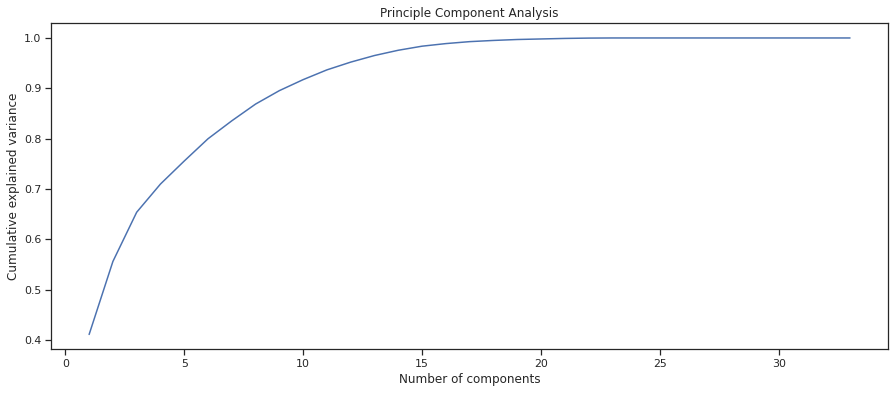

In [59]:
#Determining the shape of the axes and figure
fig, ax = plt.subplots(figsize=(15,6))

#The covariance measures how two features compare with each other and it is a vital step in finding correlation

cov = (X_fullystandardized.T @ X_fullystandardized) / (X_fullystandardized.shape[0] - 1)
#The eigenvectors represent the principal components (the directions of maximum variance) of the covariance matrix. The eigenvalues are their corresponding magnitude.
#The eigenvector that has the largest corresponding eigenvalue represents the direction of maximum variance.

eig_values, eig_vectors = np.linalg.eig(cov)

#Sorting the eigenvalues from largest to smallest
idx = np.argsort(eig_values, axis=0)[::-1]
sorted_eig_vectors = eig_vectors[:, idx]

##Plotting to see how many components are needed to explain the variance fully 
cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
xint = range(1, len(cumsum) + 1)
plt.clf()
plt.plot(xint, cumsum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Principle Component Analysis")

In [60]:
#15 components are as they explain most of the variance

###Evaluate PCA with classification algorithms used already

In [92]:
# Import Libraries

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [108]:
# SVM(RBF)
print('SVM(RBF):')

# define the pipeline
steps = [('pca', PCA(n_components=15)), ('m', SVC(kernel = 'rbf', random_state = 0))]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=15, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('%.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# SVM(Linear)
print('SVM(Linear):')

# define the pipeline
steps = [('pca', PCA(n_components=15)), ('m', SVC(kernel = 'linear', random_state = 0))]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=15, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('%.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# K-NN

print('K Nearest Neighbours:')

# define the pipeline
steps = [('pca', PCA(n_components=15)), ('m', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=15, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('%.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Random Forest

print('Random Forest Classification:')

# define the pipeline
steps = [('pca', PCA(n_components=15)), ('m', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=15, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('%.3f (%.3f)' % (mean(n_scores), std(n_scores)))

SVM(RBF):
0.661 (0.076)
SVM(Linear):
0.660 (0.107)
K Nearest Neighbours:
0.682 (0.070)
Random Forest Classification:
0.550 (0.108)


I tested PCA with all the classification models used above with boruta to gauge which would do better. K-Nearest Neighbours performs best with PCA dimension reduction.

| models||
|---------------|------|
| SVM(RBF)      | 0.66 |
| SVM(Linear)   | 0.66 |
| KNN           | 0.68 |
| RandomForest  | 0.55 |


##Conclusion and Future Work
I acknowledge that the problem being solved is hard and not clear cut specifically because of the following reasons:
Unclear Predictability of reviews: Any supervised learning problem aims to learn from the labels, given the provided features. The underlying assumption I made here is that the features I have access to are sufficient to predict a positive/negative review. However, one can imagine that a future purchase of a product can depend highly on the opinions the user receives from others because people’s sentiments towards influential individuals is very fickle and that is not captured anywhere in the features. This could cause correlation between the features and the label to be lesser than what would be ideal for supervised learning.
Unclear bias in the ratings used for training and evaluation. The inputs received could be arbitrary or temporary as people tend to change preferences especially to what they find attractive and exciting. They could also have a change of mindset and stop consuming an influencer’s content.
Future work would involve identifying and logging users’ preferences and purchases with respect to the influencer’s driving their need for products.
	ACKNOWLEDGEMENT
I would like to thank my mentor and supervisor Jacklyne Betty Njeri for insights on how I should manage and split my data as well as assistance in model selection.
